In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
pwd

u'/home/knight/matar/PYTHON/ECOGpy'

In [3]:
import os
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as hc
from scipy.spatial.distance import pdist, squareform

## Get data
Formatted as electrodes (index) x components

In [4]:
#get data (elecs x components) & format
subj, task = ('JH6','SelfAud')
filename = '{0}_{1}_loadings.csv'.format(subj, task)
df = pd.read_csv(filename)

#remove communality column (how much variance explained by components)
df = pd.DataFrame.from_csv(filename,index_col = 0)
tmp = df.pop('fit.communality') #remove column

## Calculate distance between elements and cluster
Calculate pairwise distances between observations (using correlation)

Perform agglomerative clustering using the distance matrix.

Calculate distance using *complete linkage* 

Complete linkage calculates the distance between farthest elements in cluster

Leads to spherical clusters where all points are reasonably close to each other


In [5]:
distance = pdist(df, 'correlation') #distance between elements
Z = hc.linkage(distance, method = 'complete') 

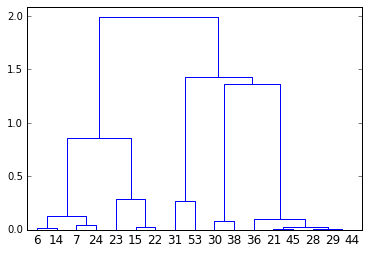

In [6]:
dend = hc.dendrogram(Z, labels = df.index, color_threshold=0) #dendrogram - y coordinate is the similarity of the two clusters

## Decide where to split the dendrogram

Once have dendrogram can cut wherever you want and get a different number of clusters

Inconsistency coefficient compares the height of a link with the average height of links below it

Calculated for each link of the hierarchical cluster tree. 

Inconsistent links indicate a natural division in the data, so can use the median inconsistency coefficient as the threshold to partition the data into electrode groups.

Cluster using distance criterion, so that the cophenetic distance between members of each cluster is less than the cutoff

Cophentic distance is how similar two elements have to be in order to be grouped into the same cluster (aka the height of the dendrogram where the 2 branches that include the elements merge together).

In [7]:
incon = hc.inconsistent(Z) #inconsistency
#cutoff = .7*max(Z[:,2]) #same as matlab's default (70% of maximum distance)
cutoff = np.median(incon[:,-1])

In [8]:
cluster = hc.fcluster(Z, cutoff, criterion = 'distance')

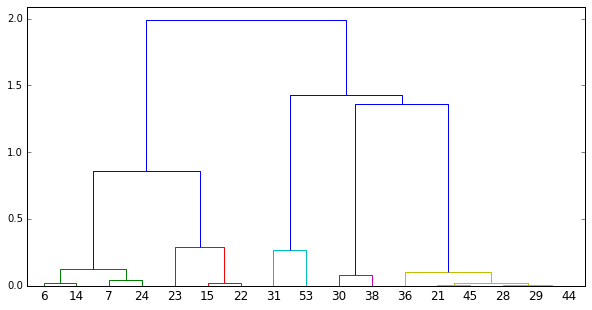

In [9]:
f, ax = plt.subplots(figsize = (10,5))
dend = hc.dendrogram(Z, labels = df.index, color_threshold=cutoff)

In [10]:
pd.DataFrame(cluster, index = df.index, columns = ['cluster'])

,cluster
6,1
7,1
14,1
15,2
21,5
22,2
23,2
24,1
28,5
29,5
